In [ ]:
# Import necessary libraries for data handling and visualization
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:

# Load IMDB dataset
vocab_size = 10000  # Limit vocabulary to 10,000 words
max_length = 200  # Limit sequence length

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

print(f"Training samples: {x_train.shape[0]}, Test samples: {x_test.shape[0]}")
print(f"Input shape: {x_train.shape[1]} (words per review)")


Training samples: 25000, Test samples: 25000
Input shape: 200 (words per review)


In [3]:

# Build an Improved Sequential Model
model = keras.Sequential([
    keras.layers.Embedding(input_dim=vocab_size, output_dim=256),  # Increased embedding size from 128 to 256
    keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=False)),  # Added Bidirectional LSTM
    keras.layers.Dropout(0.3),  # Added Dropout for regularization
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),  # Added Dropout before the output layer
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile model with adjusted optimizer settings
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), 
              loss='binary_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Train the model for 15 epochs
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Save training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 116s 289ms/step - accuracy: 0.6388 - loss: 0.5988 - val_accuracy: 0.8381 - val_loss: 0.3798
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 122s 312ms/step - accuracy: 0.8892 - loss: 0.2922 - val_accuracy: 0.8277 - val_loss: 0.4003
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 121s 309ms/step - accuracy: 0.9234 - loss: 0.2064 - val_accuracy: 0.8382 - val_loss: 0.3863
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 121s 309ms/step - accuracy: 0.9428 - loss: 0.1624 - val_accuracy: 0.8423 - val_loss: 0.4352
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 152s 389ms/step - accuracy: 0.9537 - loss: 0.1294 - val_accuracy: 0.8386 - val_loss: 0.4777
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 156s 399ms/step - accuracy: 0.9698 - loss: 0.0924 - val_accuracy: 0.8334 - val_loss: 0.6651
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 161s 410ms/step - accuracy: 0.9743 - loss: 0.0820 - val_accuracy: 0.8271 - val_loss: 0.5921
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 115s 294ms/step - accuracy: 0.9746 -

782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step
Test Accuracy: 0.8301
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     12500
           1       0.84      0.82      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



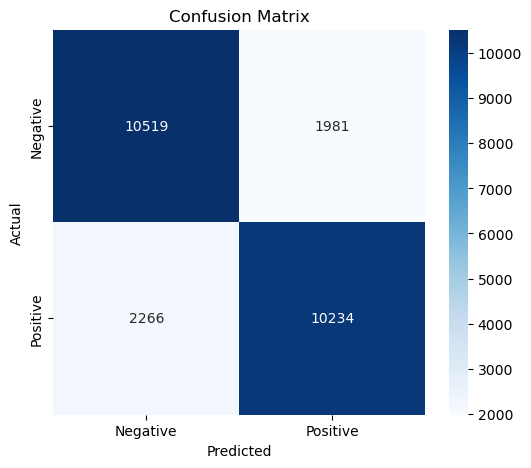

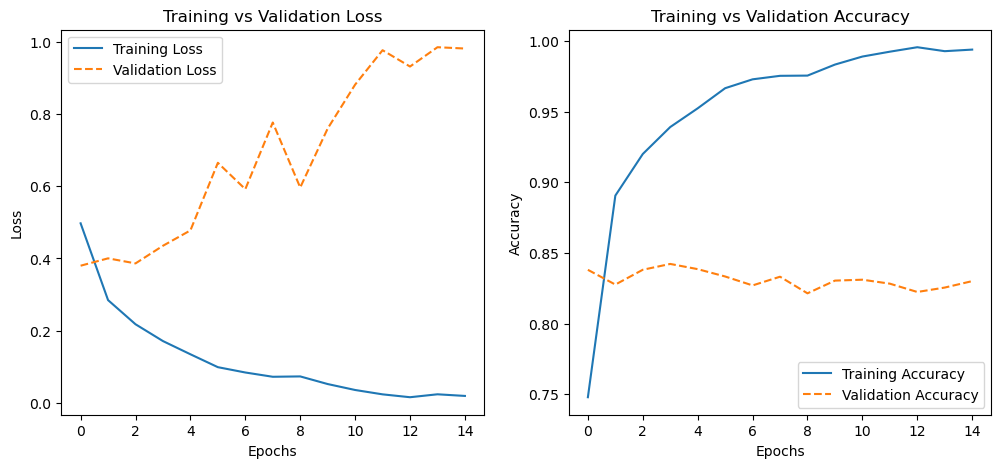

In [5]:

# Evaluate model on test set
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot Accuracy and Loss
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(train_loss, label="Training Loss")
ax[0].plot(val_loss, label="Validation Loss", linestyle="--")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Training vs Validation Loss")
ax[0].legend()

ax[1].plot(train_acc, label="Training Accuracy")
ax[1].plot(val_acc, label="Validation Accuracy", linestyle="--")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Training vs Validation Accuracy")
ax[1].legend()

plt.show()
